In [1]:
# インポートセット
from keras.datasets import mnist
import numpy as npy
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データの読み出し
mnist_raw_data = npy.load('mnist_raw.npz')

x_train=mnist_raw_data['x_train']
y_train=mnist_raw_data['y_train']
x_test=mnist_raw_data['x_test']
y_test=mnist_raw_data['y_test']

In [3]:
#データ整形
from keras.utils import np_utils

# 28×28のまま扱う
x_train=x_train.reshape(60000,28,28,1)
# 0-255⇒0-1に変換
x_train=x_train.astype('float32')
x_train=x_train/255
# 1-of-K符号化法で表現
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)

x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)



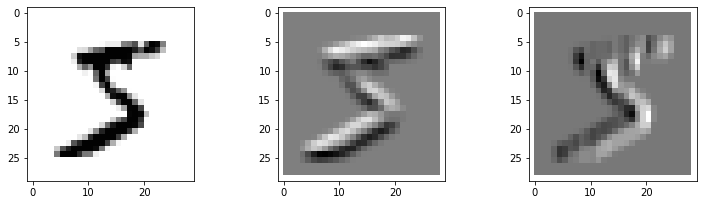

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 0
# フィルター１の実装
myfil1 = npy.array([[1,1,1],[1,1,1],[-2,-2,-2]],dtype=float)
# フィルター２の実装
myfil2 = npy.array([[-2,1,1],[-2,1,1],[-2,1,1]],dtype=float)

x_img = x_train[id_img,:,:,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
out_img1 = npy.zeros_like(x_img)
out_img2 = npy.zeros_like(x_img)

#フィルタ処理
for ih in range(img_h -3 +1):
    for iw in range(img_w -3 +1):
        # 元画像を3×3の領域に切り取る
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        # フィルタ1の処理
        out_img1[ih + 1, iw + 1] = npy.dot(img_part.reshape(-1),myfil1.reshape(-1))
        # フィルタ2の処理
        out_img2[ih + 1, iw + 1] = npy.dot(img_part.reshape(-1),myfil2.reshape(-1))
# 表示
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [5]:
# CNNモデルの実装
npy.random.seed
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8,(3,3),padding='same', input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train,y_train,batch_size=1000, epochs=20,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:3f}sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 3s 48ms/step - loss: 0.8223 - accuracy: 0.8138 - val_loss: 0.3429 - val_accuracy: 0.9063
Epoch 2/20
60/60 [==============================] - 3s 46ms/step - loss: 0.3080 - accuracy: 0.9126 - val_loss: 0.2628 - val_accuracy: 0.9245
Epoch 3/20
60/60 [==============================] - 3s 46ms/step - loss: 0.2472 - accuracy: 0.9304 - val_loss: 0.2256 - val_accuracy: 0.9365
Epoch 4/20
60/60 [==============================] - 3s 46ms/step - loss: 0.2084 - accuracy: 0.9420 - val_loss: 0.1895 - val_accuracy: 0.9470
Epoch 5/20
60/60 [==============================] - 3s 46ms/step - loss: 0.1782 - accuracy: 0.9507 - val_loss: 0.1639 - val_accuracy: 0.9560
Epoch 6/20
60/60 [==============================] - 3s 46ms/step - loss: 0.1543 - accuracy: 0.9576 - val_loss: 0.1469 - val_accuracy: 0.9603
Epoch 7/20
60/60 [==============================] - 3s 50ms/step - loss: 0.1363 - accuracy: 0.9633 - val_loss: 0.1321 - val_accuracy: 0.9634
Epoch 8/20
60

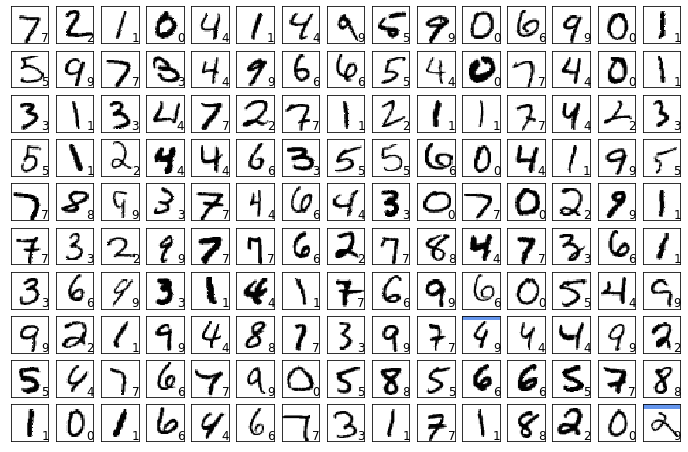

In [8]:
# テストデータの投入
def show_prediction():
    n_show = 150
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(10,15,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=npy.argmax(wk)
        plt.text(22,25.5,"%d"% prediction,fontsize=12)
        if prediction != npy.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")

show_prediction()
plt.show()